In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('retail_sales_dataset.csv',encoding='unicode_escape') # to avoid encoding error, use 'unicode_escape'
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
pd.isnull(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [6]:
#check for null values
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
# Calculate basic statistics
mean_price = df['Price per Unit'].mean()
median_quantity = df['Quantity'].median()
mode_age = df['Age'].mode().values[0]
std_total_amount = df['Total Amount'].std()

# Display the calculated statistics
print("Descriptive Statistics:")
print(f"Mean Price per Unit: {mean_price}")
print(f"Median Quantity: {median_quantity}")
print(f"Mode Age: {mode_age}")
print(f"Standard Deviation of Total Amount: {std_total_amount}")

Descriptive Statistics:
Mean Price per Unit: 179.89
Median Quantity: 3.0
Mode Age: 43
Standard Deviation of Total Amount: 559.997631555123


### Exploratory Data Analysis

### Gender

C:\Users\JOYSREE\AppData\Local\Temp\ipykernel_8012\1986917893.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


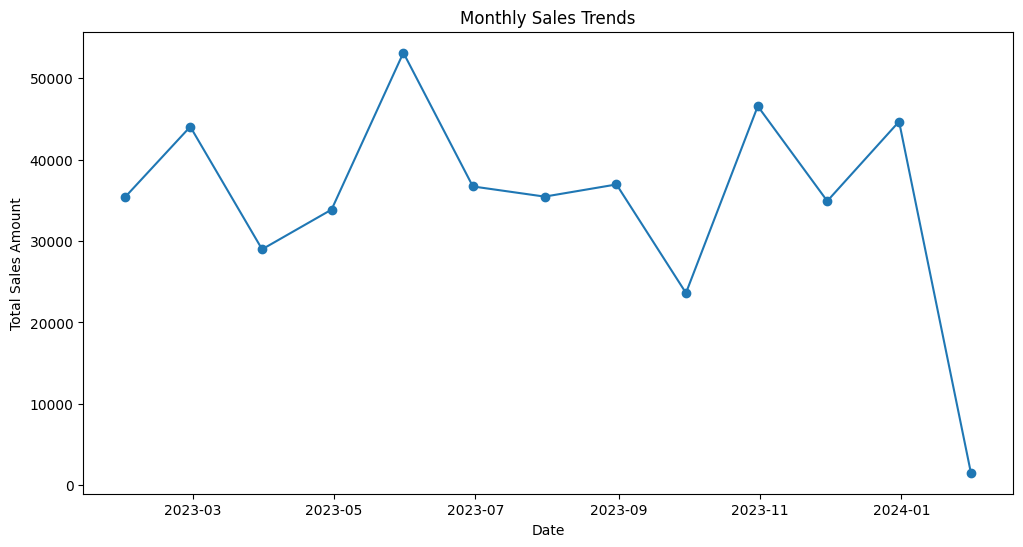

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample data to monthly frequency and analyze trends
monthly_sales = df['Total Amount'].resample('M').sum()

# Visualize time series trends

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

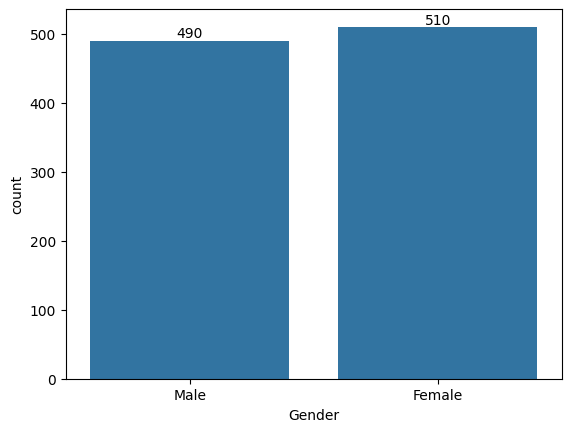

In [12]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
customer_demographics = df.groupby('Gender')['Age'].mean()

# Analyze purchasing behavior
product_sales = df.groupby('Product Category')['Quantity'].sum()

# Display the results
print("Customer Demographics:")
print(customer_demographics)
print("\nProduct Sales:")
print(product_sales)

Customer Demographics:
Gender
Female    41.356863
Male      41.428571
Name: Age, dtype: float64

Product Sales:
Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


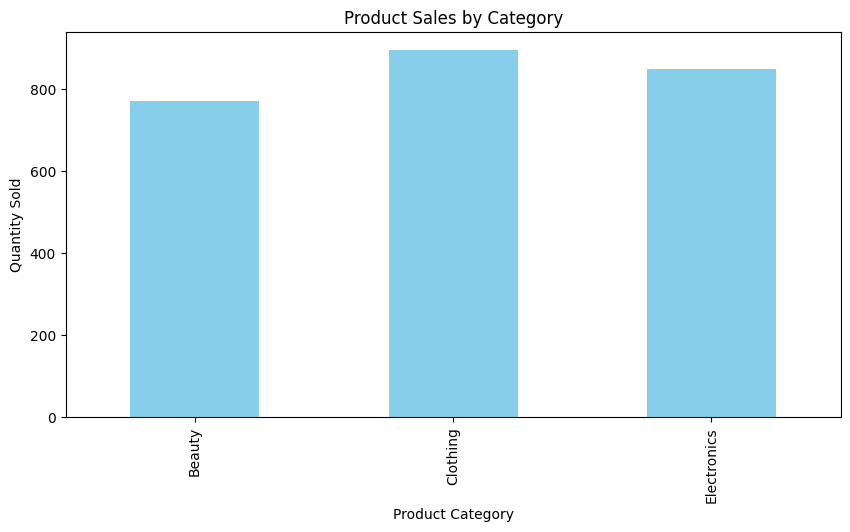

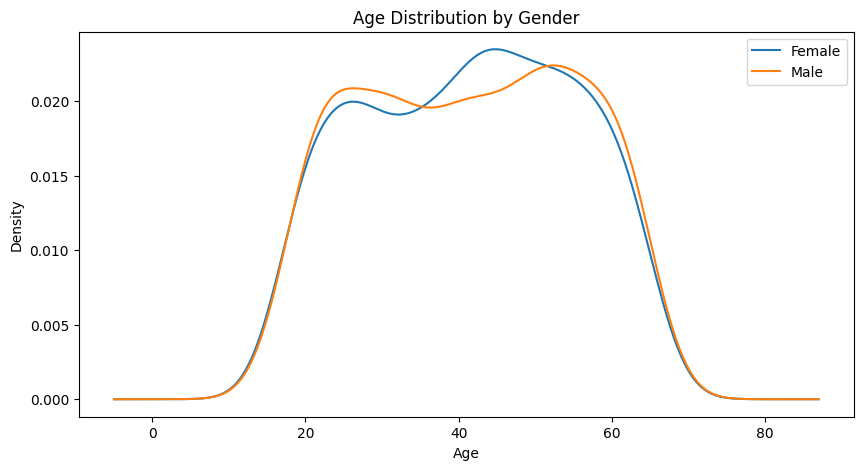

In [14]:
# Bar chart for product sales
plt.figure(figsize=(10, 5))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Product Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

# Line plot for age distribution by gender
plt.figure(figsize=(10, 5))
df.groupby('Gender')['Age'].plot(kind='kde', legend=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()